In [1]:
#dataset Splitting

import splitfolders
input_folder="D:\\deeplearning\\scratches\\data\\note_dataset"
output_folder = 'scratches/data/note_dataset_splitted'
splitfolders.ratio(input_folder,output="dataset",seed=42,ratio=(.7,.2,.1),group_prefix=None)

Copying files: 71542 files [10:34, 112.73 files/s]


In [1]:
dataset_path = 'D:\\deeplearning\\scratches\\data\\note_dataset_splitted'

In [12]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim
from torchvision import models

In [2]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models, transforms, utils
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image
import json
%matplotlib inline

In [13]:
import os
print(os.listdir(dataset_path))
classes = os.listdir(dataset_path + "/train")
print(classes)
print(len(classes))

['test', 'train', 'val']
['10', '100', '1000', '2', '20', '200', '5', '50', '500']
9


In [28]:
transform = transforms.Compose([
    transforms.RandomCrop((120,200),padding=8),
    transforms.ToTensor(),
    transforms.Normalize(mean=0., std=1.)
])

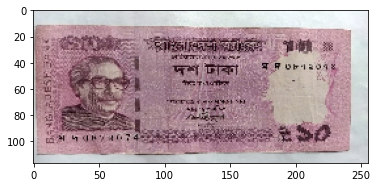

In [29]:
image = Image.open('D:\deeplearning\scratches\CSE299\\10.png')
plt.imshow(image)

In [30]:
model = models.resnet18(pretrained=True)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [31]:
# we will save the conv layer weights in this list
model_weights =[]
#we will save the 49 conv layers in this list
conv_layers = []
# get all the model children as list
model_children = list(model.children())
#counter to keep count of the conv layers
counter = 0
#append all the conv layers and their respective wights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter+=1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter+=1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolution layers: {counter}")
print("conv_layers")

Total convolution layers: 17
conv_layers


In [32]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [33]:
image = transform(image)
print(f"Image shape before: {image.shape}")
image = image.unsqueeze(0)
print(f"Image shape after: {image.shape}")
image = image.to(device)

Image shape before: torch.Size([3, 120, 200])
Image shape after: torch.Size([1, 3, 120, 200])


In [34]:
outputs = []
names = []
for layer in conv_layers[0:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
print(len(outputs))
#print feature_maps
for feature_map in outputs:
    print(feature_map.shape)

17
torch.Size([1, 64, 60, 100])
torch.Size([1, 64, 60, 100])
torch.Size([1, 64, 60, 100])
torch.Size([1, 64, 60, 100])
torch.Size([1, 64, 60, 100])
torch.Size([1, 128, 30, 50])
torch.Size([1, 128, 30, 50])
torch.Size([1, 128, 30, 50])
torch.Size([1, 128, 30, 50])
torch.Size([1, 256, 15, 25])
torch.Size([1, 256, 15, 25])
torch.Size([1, 256, 15, 25])
torch.Size([1, 256, 15, 25])
torch.Size([1, 512, 8, 13])
torch.Size([1, 512, 8, 13])
torch.Size([1, 512, 8, 13])
torch.Size([1, 512, 8, 13])


In [35]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)


(60, 100)
(60, 100)
(60, 100)
(60, 100)
(60, 100)
(30, 50)
(30, 50)
(30, 50)
(30, 50)
(15, 25)
(15, 25)
(15, 25)
(15, 25)
(8, 13)
(8, 13)
(8, 13)
(8, 13)


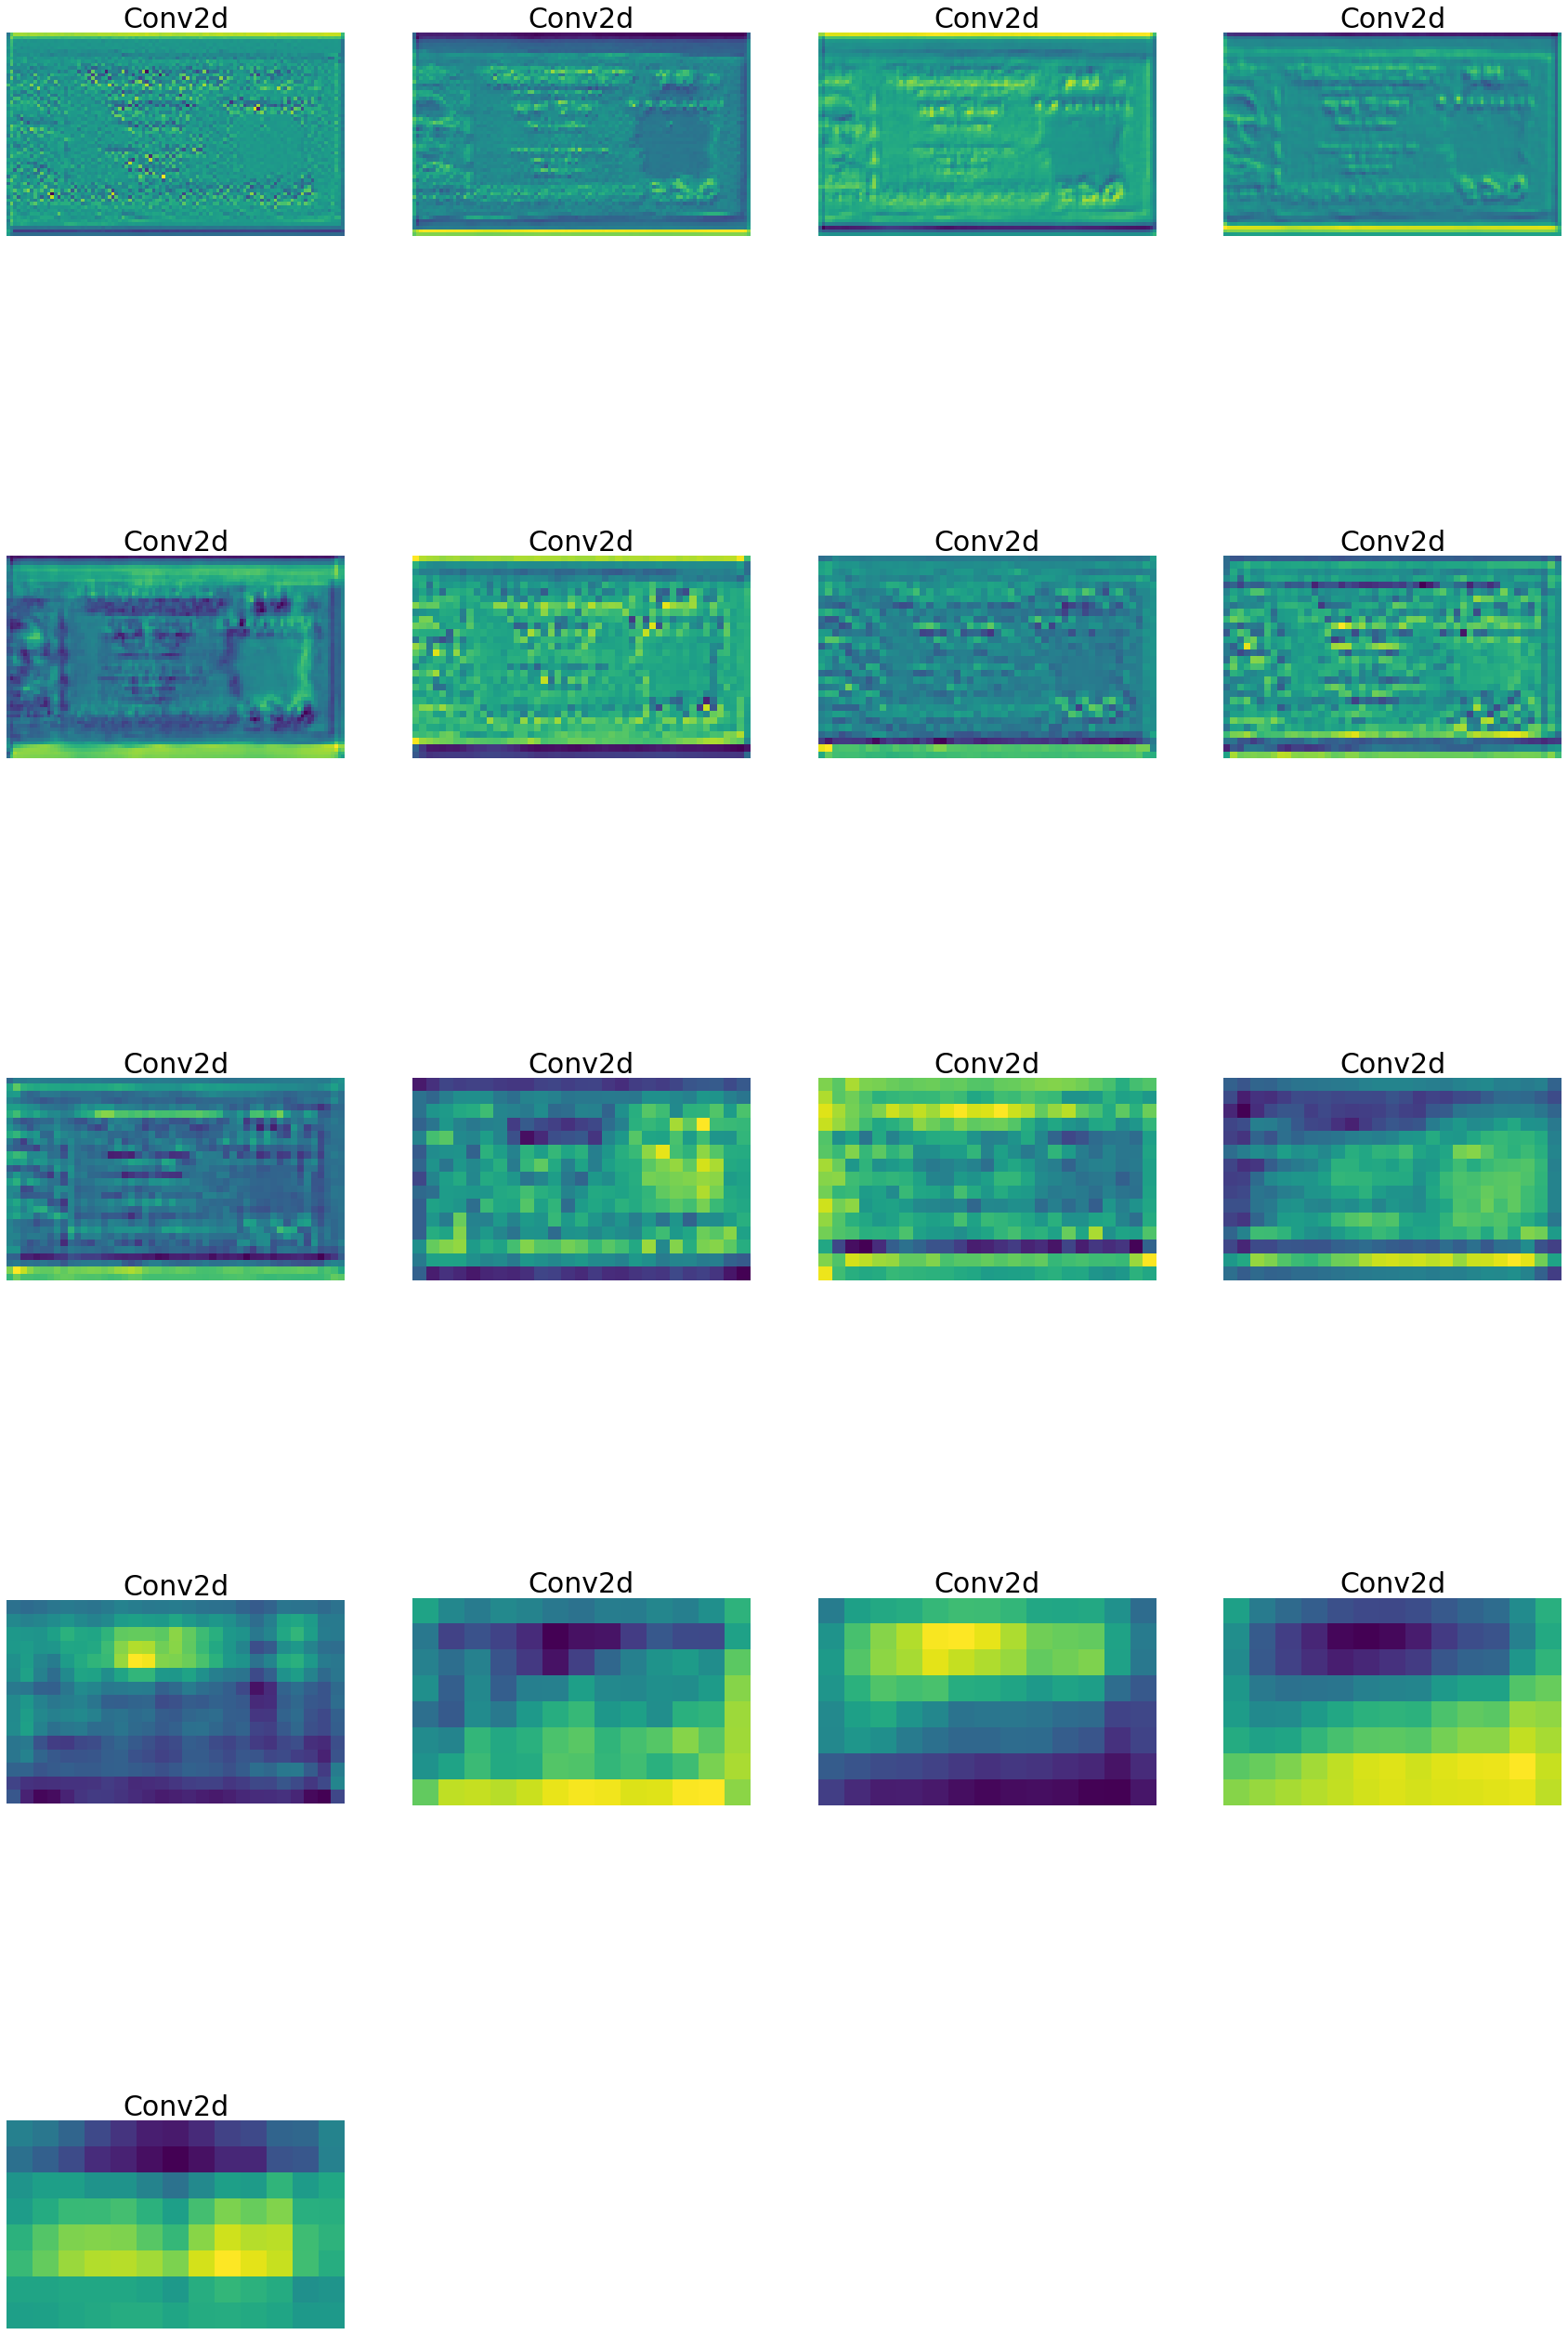

In [36]:
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
    a = fig.add_subplot(5, 4, i+1)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)
plt.savefig(str('feature_maps.jpg'), bbox_inches='tight')

In [41]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.set_printoptions(threshold=np.inf)


def visualize(input_arr, labels, num_imgs=9):
    plot_size = int(np.ceil(num_imgs / 4))
    fig = plt.figure(figsize=(12, 12))
    if len(input_arr.shape) == 4:
        num_imgs = input_arr.shape[0]
    else:
        num_imgs = 1
        input_arr = np.expand_dims(input_arr, axis=0)
        labels = [labels]
    for i in range(num_imgs):
        plt.subplot(4, plot_size, i + 1)
        plt.tight_layout()
        img = input_arr[i]

        img = np.rollaxis(img, 0, 3)
        plt.imshow(img, interpolation='none')
        plt.title("class_label: {}".format(labels[i]))
        plt.xticks([])
        plt.yticks([])


from torchvision.utils import make_grid


def show_batch(dl):
    for images, lables in dl:
        fig, ax = plt.subplots(figsize=(20, 30))
        ax.set_xticks([])
        ax.set_yticks([])

        ax.imshow(make_grid(images, nrow=2).permute(1, 2, 0).clamp(0, 1))
        break

6


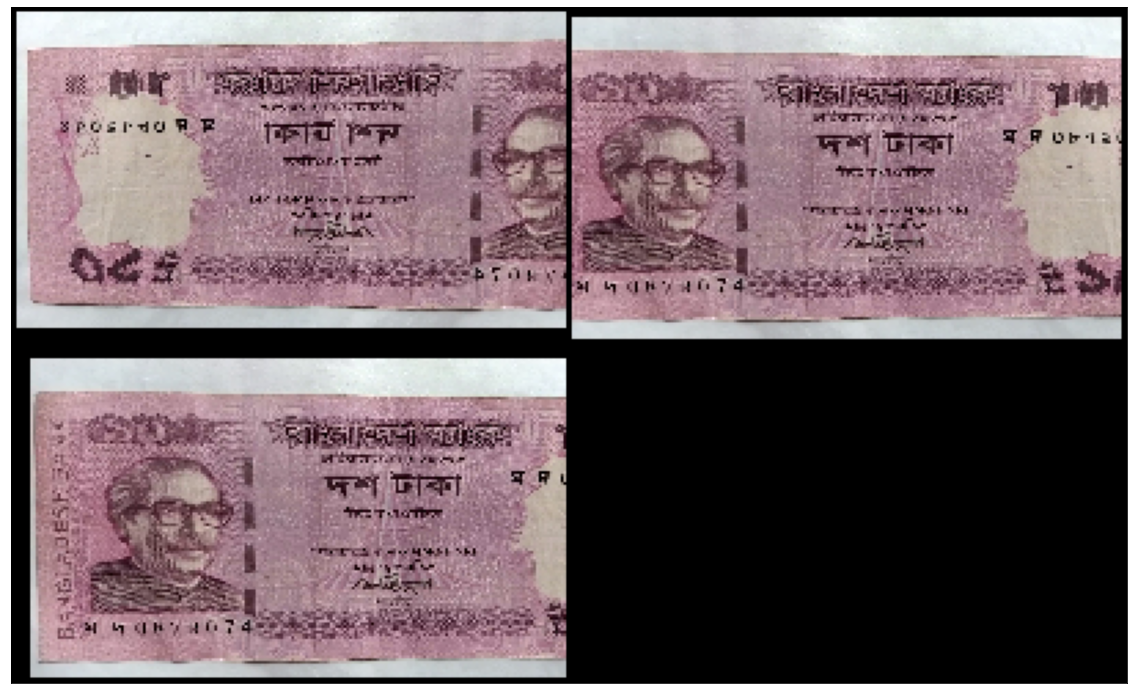

In [99]:
import torchvision.transforms as tt
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

train_tsfm = tt.Compose([
    tt.RandomHorizontalFlip(),
    tt.RandomCrop((120, 200), padding=8),
    tt.ToTensor(),
])
train_tsfm2 = tt.Compose([
    tt.RandomHorizontalFlip(),
    tt.ToTensor(),
])
images = ImageFolder(r'C:\Users\mohib\OneDrive\Desktop\test', train_tsfm)
images2 = ImageFolder(r'C:\Users\mohib\OneDrive\Desktop\test2', train_tsfm2)
import torch
from torch.utils.data import TensorDataset, ConcatDataset, DataLoader

dataset = ConcatDataset([images, images2])
print(len(dataset))

train_dl = DataLoader(dataset, 3)
show_batch(train_dl)

In [103]:
train_np = np.array(train_dl.dataset)
print(train_np[4])


[tensor([[[0.8471, 0.8471, 0.8549,  ..., 0.9255, 0.9451, 0.9255],
          [0.8510, 0.8549, 0.8510,  ..., 0.9451, 0.9529, 0.9373],
          [0.8510, 0.8353, 0.8431,  ..., 0.9333, 0.9373, 0.9451],
          ...,
          [0.7451, 0.7529, 0.7490,  ..., 0.8235, 0.8157, 0.8157],
          [0.7569, 0.7569, 0.7490,  ..., 0.8275, 0.8235, 0.8275],
          [0.7569, 0.7490, 0.7529,  ..., 0.8235, 0.8275, 0.8196]],

         [[0.8627, 0.8627, 0.8706,  ..., 0.9412, 0.9490, 0.9294],
          [0.8667, 0.8549, 0.8588,  ..., 0.9608, 0.9569, 0.9451],
          [0.8667, 0.8588, 0.8667,  ..., 0.9490, 0.9529, 0.9490],
          ...,
          [0.7608, 0.7686, 0.7725,  ..., 0.8392, 0.8196, 0.8235],
          [0.7647, 0.7686, 0.7725,  ..., 0.8471, 0.8314, 0.8314],
          [0.7608, 0.7647, 0.7686,  ..., 0.8392, 0.8314, 0.8235]],

         [[0.8706, 0.8706, 0.8784,  ..., 0.9569, 0.9608, 0.9412],
          [0.8745, 0.8667, 0.8745,  ..., 0.9765, 0.9686, 0.9569],
          [0.8745, 0.8627, 0.8784,  ..., 0

C:\Users\mohib\AppData\Local\Temp\ipykernel_9940\2869223144.py:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  train_np = np.array(train_dl.dataset)
C:\Users\mohib\AppData\Local\Temp\ipykernel_9940\2869223144.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_np = np.array(train_dl.dataset)
